# Project: Train a Quadcopter How to Fly

Design an agent to fly a quadcopter, and then train it using a reinforcement learning algorithm of your choice! 

Try to apply the techniques you have learnt, but also feel free to come up with innovative ideas and test them.

## Instructions

Take a look at the files in the directory to better understand the structure of the project. 

- `task.py`: Define your task (environment) in this file.
- `agents/`: Folder containing reinforcement learning agents.
    - `policy_search.py`: A sample agent has been provided here.
    - `agent.py`: Develop your agent here.
- `physics_sim.py`: This file contains the simulator for the quadcopter.  **DO NOT MODIFY THIS FILE**.

For this project, you will define your own task in `task.py`.  Although we have provided a example task to get you started, you are encouraged to change it.  Later in this notebook, you will learn more about how to amend this file.

You will also design a reinforcement learning agent in `agent.py` to complete your chosen task.  

You are welcome to create any additional files to help you to organize your code.  For instance, you may find it useful to define a `model.py` file defining any needed neural network architectures.

## Controlling the Quadcopter

We provide a sample agent in the code cell below to show you how to use the sim to control the quadcopter.  This agent is even simpler than the sample agent that you'll examine (in `agents/policy_search.py`) later in this notebook!

The agent controls the quadcopter by setting the revolutions per second on each of its four rotors.  The provided agent in the `Basic_Agent` class below always selects a random action for each of the four rotors.  These four speeds are returned by the `act` method as a list of four floating-point numbers.  

For this project, the agent that you will implement in `agents/agent.py` will have a far more intelligent method for selecting actions!

In [1]:
import random

class Basic_Agent():
    def __init__(self, task):
        self.task = task
    
    def act(self):
        new_thrust = random.gauss(450., 25.)
        return [new_thrust + random.gauss(0., 1.) for x in range(4)]

Run the code cell below to have the agent select actions to control the quadcopter.  

Feel free to change the provided values of `runtime`, `init_pose`, `init_velocities`, and `init_angle_velocities` below to change the starting conditions of the quadcopter.

The `labels` list below annotates statistics that are saved while running the simulation.  All of this information is saved in a text file `data.txt` and stored in the dictionary `results`.  

In [2]:
%load_ext autoreload
%autoreload 2

import csv
import numpy as np
from task import Task

# Modify the values below to give the quadcopter a different starting position.
runtime = 5.                                     # time limit of the episode
init_pose = np.array([0., 0., 10., 0., 0., 0.])  # initial pose
init_velocities = np.array([0., 0., 0.])         # initial velocities
init_angle_velocities = np.array([0., 0., 0.])   # initial angle velocities
file_output = 'data.txt'                         # file name for saved results

# Setup
task = Task(init_pose, init_velocities, init_angle_velocities, runtime)
agent = Basic_Agent(task)
done = False
labels = ['time', 'x', 'y', 'z', 'phi', 'theta', 'psi', 'x_velocity',
          'y_velocity', 'z_velocity', 'phi_velocity', 'theta_velocity',
          'psi_velocity', 'rotor_speed1', 'rotor_speed2', 'rotor_speed3', 'rotor_speed4']
results = {x : [] for x in labels}

# Run the simulation, and save the results.
with open(file_output, 'w') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(labels)
    while True:
        rotor_speeds = agent.act()
        _, _, done = task.step(rotor_speeds)
        to_write = [task.sim.time] + list(task.sim.pose) + list(task.sim.v) + list(task.sim.angular_v) + list(rotor_speeds)
        for ii in range(len(labels)):
            results[labels[ii]].append(to_write[ii])
        writer.writerow(to_write)
        if done:
            break

Run the code cell below to visualize how the position of the quadcopter evolved during the simulation.

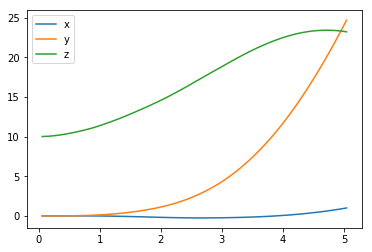

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(results['time'], results['x'], label='x')
plt.plot(results['time'], results['y'], label='y')
plt.plot(results['time'], results['z'], label='z')
plt.legend()
_ = plt.ylim()

#### This is the 3D visualization of the same positioning data
#### Important:
For all the coming 3D viz in this notebook, you might need to run twice the cell code below to get the 3D viz (because of differences between %matplotlib inline and %matplotlib notebook)

<IPython.core.display.Javascript object>


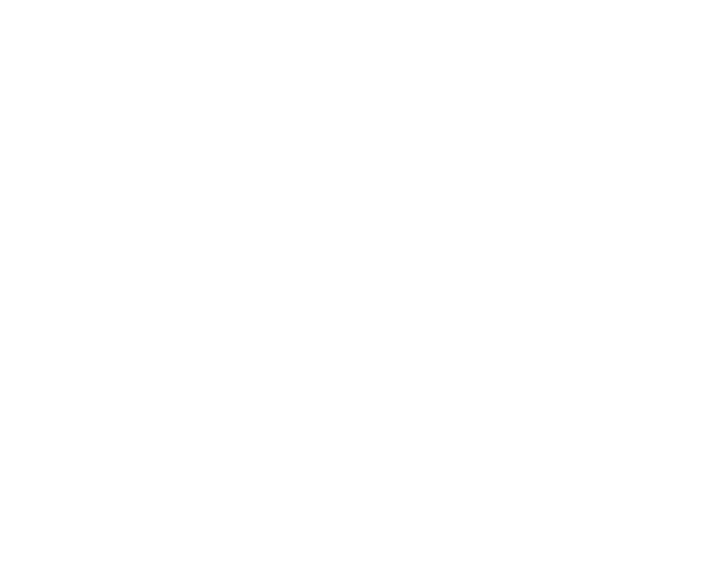

In [4]:
import matplotlib.pyplot as plt
%matplotlib notebook
%matplotlib notebook

from mpl_toolkits.mplot3d import Axes3D

# plotting trajectory
fig = plt.figure(figsize = (10, 8))
ax = Axes3D(fig)

x = np.array(results['x'])
y = np.array(results['y'])
z = np.array(results['z'])

plt.title('Quadcopter trajectory', size = 15)
ax.set_xlabel('X axis', color='b')
ax.set_ylabel('Y axis',  color='r')
ax.set_zlabel('Z axis',  color='g')

# ax.scatter(x, y, z)

# colored by index
N = len(z)
ax.scatter(x, y, z, c = plt.cm.jet(np.linspace(0,1,N)))

# plotting goal
ax.plot([0.], [0.], [10.], markerfacecolor='r', markeredgecolor='r', marker='x', markersize=10)
# plt.text([20.], [20.], [50.], 'Goal')
ax.text(0.5, 0.5, 10., "Goal\n'target_pos'", color='black', size=12)

plt.show()

The next code cell visualizes the velocity of the quadcopter.

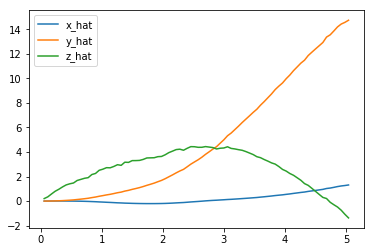

In [5]:
%matplotlib inline
plt.plot(results['time'], results['x_velocity'], label='x_hat')
plt.plot(results['time'], results['y_velocity'], label='y_hat')
plt.plot(results['time'], results['z_velocity'], label='z_hat')
plt.legend()
_ = plt.ylim()

### Knowledge here: Euler angles (and then aeronautic)
Some basic knowledge to have before continuing your reading.
- **x** = **phi** = **Roll**
- **y** = **theta** = **Pitch**
- **z** = **psi** = **Yaw**

![title](quadcopter_phi_psi_theta.png)

Next, you can plot the Euler angles (the rotation of the quadcopter over the $x$-, $y$-, and $z$-axes),

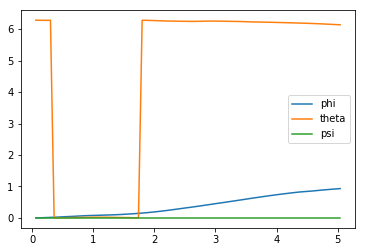

In [6]:
%matplotlib inline
plt.plot(results['time'], results['phi'], label='phi')
plt.plot(results['time'], results['theta'], label='theta')
plt.plot(results['time'], results['psi'], label='psi')
plt.legend()
_ = plt.ylim()

before plotting the velocities (in radians per second) corresponding to each of the Euler angles.

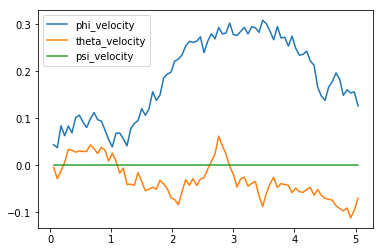

In [7]:
plt.plot(results['time'], results['phi_velocity'], label='phi_velocity')
plt.plot(results['time'], results['theta_velocity'], label='theta_velocity')
plt.plot(results['time'], results['psi_velocity'], label='psi_velocity')
plt.legend()
_ = plt.ylim()

Finally, you can use the code cell below to print the agent's choice of actions.  

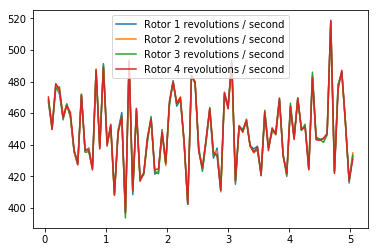

In [8]:
plt.plot(results['time'], results['rotor_speed1'], label='Rotor 1 revolutions / second')
plt.plot(results['time'], results['rotor_speed2'], label='Rotor 2 revolutions / second')
plt.plot(results['time'], results['rotor_speed3'], label='Rotor 3 revolutions / second')
plt.plot(results['time'], results['rotor_speed4'], label='Rotor 4 revolutions / second')
plt.legend()
_ = plt.ylim()

When specifying a task, you will derive the environment state from the simulator.  Run the code cell below to print the values of the following variables at the end of the simulation:
- `task.sim.pose` (the position of the quadcopter in ($x,y,z$) dimensions and the Euler angles),
- `task.sim.v` (the velocity of the quadcopter in ($x,y,z$) dimensions), and
- `task.sim.angular_v` (radians/second for each of the three Euler angles).

In [9]:
# the pose, velocity, and angular velocity of the quadcopter at the end of the episode
print(task.sim.pose)
print(task.sim.v)
print(task.sim.angular_v)

[  0.9965969   24.65994502  23.1993994    0.93198477   6.13894973   0.        ]
[  1.31257045  14.74561672  -1.37365656]
[ 0.12621131 -0.06979836  0.        ]


### Knowledge here: 6DoF
'6-dimensional pose of the quadcopter' mentioned below refers to **Six degrees of freedom (6DoF)**.(https://en.wikipedia.org/wiki/Six_degrees_of_freedom)<br>
<br>Which is the freedom of movement of a rigid body in three-dimensional space. Specifically, the body is free to change position as:
1. forward/backward (surge), here = x
2. left/right (sway), here = y
3. up/down (heave), here = z, translation in three perpendicular axes
<br>combined with changes in orientation through rotation about three perpendicular axes, often termed
4. roll (longitudinal axis), here = phi
5. pitch (transverse axis), here = theta
6. yaw (normal axis), here = psi.

**In other words: task.sim.pose provides** >>> **[x, y, z, phi, theta, psi]**
##### The six degrees of freedom: forward/back, left/right, up/down, roll, pitch, yaw.

![title](6DOF_en.jpg)

In the sample task in `task.py`, we use the 6-dimensional pose of the quadcopter to construct the state of the environment at each timestep.  However, when amending the task for your purposes, you are welcome to expand the size of the state vector by including the velocity information.  You can use any combination of the pose, velocity, and angular velocity - feel free to tinker here, and construct the state to suit your task.

## The Task

A sample task has been provided for you in `task.py`.  Open this file in a new window now. 

The `__init__()` method is used to initialize several variables that are needed to specify the task.  
- The simulator is initialized as an instance of the `PhysicsSim` class (from `physics_sim.py`).  
- Inspired by the methodology in the original DDPG paper, we make use of action repeats.  For each timestep of the agent, we step the simulation `action_repeats` timesteps.  If you are not familiar with action repeats, please read the **Results** section in [the DDPG paper](https://arxiv.org/abs/1509.02971).
- We set the number of elements in the state vector.  For the sample task, we only work with the 6-dimensional pose information.  To set the size of the state (`state_size`), we must take action repeats into account.  
- The environment will always have a 4-dimensional action space, with one entry for each rotor (`action_size=4`). You can set the minimum (`action_low`) and maximum (`action_high`) values of each entry here.
- The sample task in this provided file is for the agent to reach a target position.  We specify that target position as a variable.

The `reset()` method resets the simulator.  The agent should call this method every time the episode ends.  You can see an example of this in the code cell below.

The `step()` method is perhaps the most important.  It accepts the agent's choice of action `rotor_speeds`, which is used to prepare the next state to pass on to the agent.  Then, the reward is computed from `get_reward()`.  The episode is considered done if the time limit has been exceeded, or the quadcopter has travelled outside of the bounds of the simulation.

In the next section, you will learn how to test the performance of an agent on this task.

## The Agent

The sample agent given in `agents/policy_search.py` uses a very simplistic linear policy to directly compute the action vector as a dot product of the state vector and a matrix of weights. Then, it randomly perturbs the parameters by adding some Gaussian noise, to produce a different policy. Based on the average reward obtained in each episode (`score`), it keeps track of the best set of parameters found so far, how the score is changing, and accordingly tweaks a scaling factor to widen or tighten the noise.

Run the code cell below to see how the agent performs on the sample task.

import sys
import pandas as pd
from agents.policy_search import PolicySearch_Agent
from task import Task

num_episodes = 1000
target_pos = np.array([0., 0., 10.])
task = Task(target_pos=target_pos)
agent = PolicySearch_Agent(task) 

for i_episode in range(1, num_episodes+1):
    state = agent.reset_episode() # start a new episode
    while True:
        action = agent.act(state) 
        next_state, reward, done = task.step(action)
        agent.step(reward, done)
        state = next_state
        if done:
            print("\rEpisode = {:4d}, score = {:7.3f} (best = {:7.3f}), noise_scale = {}".format(
                i_episode, agent.score, agent.best_score, agent.noise_scale), end="")  # [debug]
            break
    sys.stdout.flush()

This agent should perform very poorly on this task.  And that's where you come in!

## Define the Task, Design the Agent, and Train Your Agent!

Amend `task.py` to specify a task of your choosing.  If you're unsure what kind of task to specify, you may like to teach your quadcopter to takeoff, hover in place, land softly, or reach a target pose.  

After specifying your task, use the sample agent in `agents/policy_search.py` as a template to define your own agent in `agents/agent.py`.  You can borrow whatever you need from the sample agent, including ideas on how you might modularize your code (using helper methods like `act()`, `learn()`, `reset_episode()`, etc.).

Note that it is **highly unlikely** that the first agent and task that you specify will learn well.  You will likely have to tweak various hyperparameters and the reward function for your task until you arrive at reasonably good behavior.

As you develop your agent, it's important to keep an eye on how it's performing. Use the code above as inspiration to build in a mechanism to log/save the total rewards obtained in each episode to file.  If the episode rewards are gradually increasing, this is an indication that your agent is learning.

In [10]:
## TODO: Train your agent here.

### Training of my agent here.

In [11]:
import csv
import math
import numpy as np
import sys
import pandas as pd
from agents.agent import DDPG
from task_mh2 import Task_mh

# Initialization of quadcopter's starting position.
runtime = 5.                                     # time limit of the episode
init_pose = np.array([0., 0., 10., 0., 0., 0.])  # initial pose
init_velocities = np.array([0., 0., 0.])         # initial velocities
init_angle_velocities = np.array([0., 0., 0.])   # initial angle velocities

num_episodes = 800
target_pos = np.array([20., 2., 89.]) # Goal is to take-off
task = Task_mh(target_pos=target_pos)
agent = DDPG(task)

# ------- initialization of score monitoring part ------- #
best_score = -math.inf
best_x = 0
best_y = 0
best_z = 0
best_x_hat = 0
best_y_hat = 0
best_z_hat = 0
best_phi_velocity = 0
best_theta_velocity = 0
best_psi_velocity = 0
        
data = {}

Using TensorFlow backend.


In [12]:
import matplotlib.pyplot as plt
# structuring the docs that will save results.
# for visualization of flight sim
label_output = 'sav_data_mh.txt'

# for visualization of agent reward
# reward_output = "reward_mh.txt"

# lists with label that will feed dictionaries for docs
labels = ['time', 'x', 'y', 'z', 'phi', 'theta', 'psi', 'x_velocity',
          'y_velocity', 'z_velocity', 'phi_velocity', 'theta_velocity',
          'psi_velocity', 'rotor_speed1', 'rotor_speed2', 'rotor_speed3', 'rotor_speed4']


reward_labels = ['episode', 'reward',
                 'best_x','best_y', 'best_z',
                 'best_x_hat', 'best_y_hat','best_z_hat',
                 'best_phi_velocity', 'best_theta_velocity', 'best_psi_velocity']

# dictionaries 
results_mh = {x : [] for x in labels}
reward_results = {x : [] for x in reward_labels}


# Run the simulation / Save the results.
with open(label_output, 'w') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(labels)
    
    for i_episode in range(1, num_episodes+1):
        state = agent.reset_episode()
        score = 0

        while True:
            action = agent.act(state) 
            next_state, reward, done = task.step(action)
            agent.step(action, reward, next_state, done)
            state = next_state
            score += reward
            
            if score > best_score:
                best_x = task.sim.pose[0] # best position x
                best_y = task.sim.pose[1] # best position y
                best_z = task.sim.pose[2] # best position z
                best_x_hat = task.sim.v[0] # best velocity x
                best_y_hat = task.sim.v[1] # best velocity y
                best_z_hat = task.sim.v[2] # best velocity z
                best_phi_velocity = task.sim.angular_v[0] # angular velocity phi (roll)
                best_theta_velocity = task.sim.angular_v[1] # angular velocity theta (pitch)
                best_psi_velocity = task.sim.angular_v[2] # angular velocity psi (yaw)

            best_score = max(score, best_score)

            data[i_episode] = {'Episode': i_episode, 'Reward':score,'Action':action,'Best_Score':best_score,
                                'Position_x':task.sim.pose[0],'Position_y':task.sim.pose[1],'Position_z':task.sim.pose[2]}

            # writing into label_mh.txt
            to_write = [task.sim.time] + list(task.sim.pose) + list(task.sim.v) + list(task.sim.angular_v) + list(rotor_speeds)
            for ii in range(len(labels)):
                results_mh[labels[ii]].append(to_write[ii])
            writer.writerow(to_write)

            # monitoring the agent performances
            if done:
                print("\rEpisode = {:4d}, score = {:7.3f} (best = {:7.3f}), last_position = ({:5.1f},{:5.1f},{:5.1f}), best_position = ({:5.1f},{:5.1f},{:5.1f})".format(
                    i_episode, score, best_score, task.sim.pose[0], task.sim.pose[1], task.sim.pose[2], best_x, best_y, best_z), end="")
                break

        # monitoring agent's progress
        reward_results['episode'].append(i_episode)
        reward_results['reward'].append(score)
        reward_results['best_x'].append(best_x)
        reward_results['best_y'].append(best_y)
        reward_results['best_z'].append(best_z)
        reward_results['best_x_hat'].append(best_x_hat)
        reward_results['best_y_hat'].append(best_y_hat)
        reward_results['best_z_hat'].append(best_z_hat)
        reward_results['best_phi_velocity'].append(best_phi_velocity)
        reward_results['best_theta_velocity'].append(best_theta_velocity)
        reward_results['best_psi_velocity'].append(best_psi_velocity)

        sys.stdout.flush()



Episode =  800, score =  29.395 (best = 151.336), last_position = ( -0.0, -0.0,  0.0), best_position = ( 27.0, 21.7,152.4)

### 3D Visualization of quadcopter's training trajectories
##### run this cell twice to be able to see the 3D scatter.

<IPython.core.display.Javascript object>


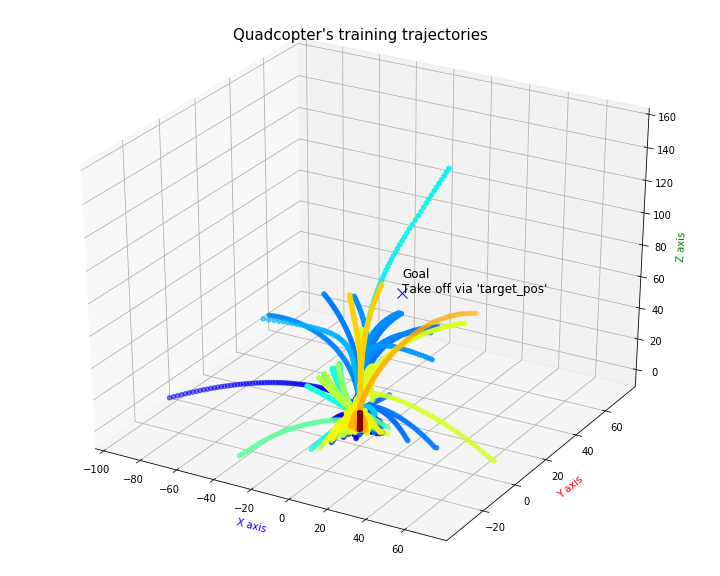

In [16]:
import matplotlib.pyplot as plt
%matplotlib notebook
%matplotlib notebook

from mpl_toolkits.mplot3d import Axes3D

# plotting trajectories
fig = plt.figure(figsize = (10, 8))
ax = Axes3D(fig)

x = np.array(results_mh['x'])
y = np.array(results_mh['y'])
z = np.array(results_mh['z'])

plt.title('Quadcopter\'s training trajectories', size = 15)
ax.set_xlabel('X axis', color='b')
ax.set_ylabel('Y axis',  color='r')
ax.set_zlabel('Z axis',  color='g')

# ax.scatter(x, y, z)

# colored by index
N = len(z)
ax.scatter(x, y, z, c = plt.cm.jet(np.linspace(0,1,N)))

# plotting goal
ax.plot([20.], [2.], [89.], markerfacecolor='r', markeredgecolor='b', marker='x', markersize=10)
ax.text(20.2, 2.2, 89., "Goal\nTake off via 'target_pos'", color='black', size=12)

plt.show()

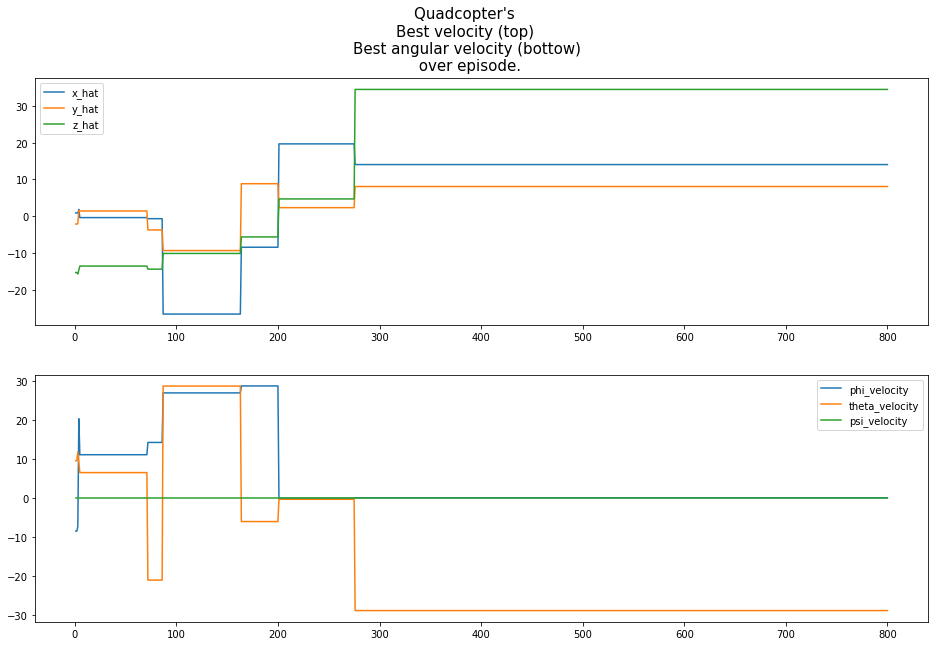

In [14]:
%matplotlib inline

fig, (ax1, ax2) = plt.subplots(2, figsize=(16, 10))
fig.suptitle('Quadcopter\'s \nBest velocity (top) \nBest angular velocity (bottow)\n over episode.', size = 15)

# ax1.title('Quadcopter\'s best velocity', size = 15)
ax1.plot(reward_results['episode'], reward_results['best_x_hat'], label='x_hat')
ax1.plot(reward_results['episode'], reward_results['best_y_hat'], label='y_hat')
ax1.plot(reward_results['episode'], reward_results['best_z_hat'], label='z_hat')
ax1.legend()
_ = plt.ylim()


# ax2.title('Quadcopter\'s best angular velocity', size = 15)
ax2.plot(reward_results['episode'], reward_results['best_phi_velocity'], label='phi_velocity')
ax2.plot(reward_results['episode'], reward_results['best_theta_velocity'], label='theta_velocity')
ax2.plot(reward_results['episode'], reward_results['best_psi_velocity'], label='psi_velocity')
ax2.legend()
_ = plt.ylim()

## Plot the Rewards

Once you are satisfied with your performance, plot the episode rewards, either from a single run, or averaged over multiple runs. 

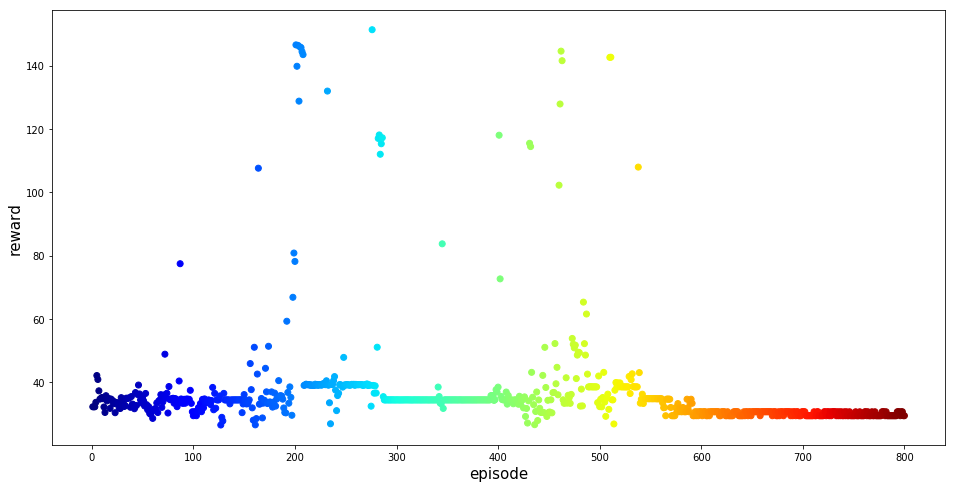

In [15]:
import matplotlib.cm as cm

ep = reward_results['episode']
re = reward_results['reward']

# The colormap
cmap = cm.jet

# Create figure and axes
fig = plt.figure(figsize = (16, 8))

ax = fig.add_subplot(1, 1, 1)
ax.set_xlabel('episode', size = 15)
ax.set_ylabel('reward', size = 15)
c = np.linspace(0, len(ep), 800)
ax.scatter(ep, re, c=c, cmap=cmap)

## Reflections

**Question 1**: Describe the task that you specified in `task.py`.  How did you design the reward function?

**Answer**:<br>
The task that I've specified is to reach a specific position as known as target_pos.<br>

At the beginning I end up with the hyperbolic tangent function rapidly which provided low results. Then spent 48hrs on trying a scenario with basic if condition such as:
- the quadcopter gets a positive reward if it took off
- while up there, it gets another positive reward if it gets higher than the target (focus on z, then).
- while up there, it gets a huge positive reward if the distance (square root of sum of square error) between the position of quadcopter and target position <10.
And regarding penalization, two ways:
- if the quacopter stays below the target position,
- if it done before the timing (5) provide by the Physics.

to finally end up with :
np.tanh(1-0.005*(abs(self.sim.pose[:3] - self.target_pos)).sum())

**Question 2**: Discuss your agent briefly, using the following questions as a guide:

- What learning algorithm(s) did you try? What worked best for you?
- What was your final choice of hyperparameters (such as $\alpha$, $\gamma$, $\epsilon$, etc.)?
- What neural network architecture did you use (if any)? Specify layers, sizes, activation functions, etc.

**Answer**:
- I've tried only the DDPG (deep deterministic policy gradient) related to the fact that the actions space is continuous and this algorithm is more indicated for that type of state and acion spaces.<br>

- Hyperparameters values are:

    - Buffer_size = 1000000
    - batch_size = 64
    -  mu = 0
    - theta = 0.15
    - sigma = 0.2
    - gamma = 0.99
    - tau = 0.02
    - Adam()
- NN architecture :

    - Actor 3 hidden layers:
       - layer 1 : Dense(64 hidden units) + BatchNormalization + Relu Activation
       - layer 2 : Dense(128 hidden units) + BatchNormalization + Relu Activation + dropout(0.3)
       - layer 3: Dense(64 hidden units) + BatchNormalization + Relu Activation

    - Critic 2 hidden layers for states and actions subflows:
       - layer 1 : Dense(64 hidden units) + BatchNormalization + Relu Activation
       - layer 2 : Dense(128 hidden units) + BatchNormalization + Relu Activation
       - 1 layer : layers.Dense(units=32) + Relu Activation when merging two (states and actions) subflows.


**Question 3**: Using the episode rewards plot, discuss how the agent learned over time.

- Was it an easy task to learn or hard?
- Was there a gradual learning curve, or an aha moment?
- How good was the final performance of the agent? (e.g. mean rewards over the last 10 episodes)

**Answer**:
- I wasn't easy at all: understand the environment, the plotting provided, the initial .py documents. This is why the 1st thing I've done is to plot results in 3D and looking for some knowledge and picture about aeronautic, euler angle and 6 positions explanations. As I'm the type of person who understand things with scketchs and pictures.<br>

- "gradual learning curve"... speaking about my own understanding or about the agent?
    - Both we use have learning curves ;-D with exploration and exploitation with several little hah ha moment. But I've to say that agent can't have very erraticly behavior sometimes and other time very homogeneous behavior.
    - I've observed that at the best cases, the agent can succeed for 30 to 90 espisode in a row to be close to the target_pos and that 3 or 4 sequences within 1000 episodes.
 
- And also some other cases with the initial NN architecture provided, no matter how many episode you set (500, 1000, 2000) the agent is close to the target less than 100 episodes from the end (but never under 20).

**Question 4**: Briefly summarize your experience working on this project. You can use the following prompts for ideas.

- What was the hardest part of the project? (e.g. getting started, plotting, specifying the task, etc.)
- Did you find anything interesting in how the quadcopter or your agent behaved?

**Answer**:
- In all this hardwork, the hardest part is the reward function. I felt I didn't have the right structured method to strategically producing step by step a robust function method. I really have the feeling to looking for gold in a mine. I'm sure there is a much more efficient, professional way to work on this specific task. The other hardest point is the noise that I didn't succeed to enhance. And finally, I'm frustrated to not having the ability to create a kind of robust grid search for the 5 hyperparameters.
- Yes, at the best moment, I've observed that, thanks to the 3D x, y, z position visualization, of all the 1000 training trajectories draw a 'palm tree' design. Meaning that the quadcopter always take-off, have a fixed x = 0 and an exploration of position y.